# Happiness Team : EDA Notebook - Jonny Keane

# Abstract

In this notebook, I explore the data set, learning about feature engineering that needs to be done for our data. A lot of my work in this notebook uses geopandas where I look to create plots to visualize the dataset in plots that represent the globe. The most notable of these plots are show the distribution of the average happiness score based on longitude and latitude. This was one of our intial objectives that we wanted to explore because we weren't sure if geographic location could be a predictive feature because of factors such as climates associated with different latitudes.

## Research Questions

We did not have a main hypothesis to test with our project, but we had several objectives we wanted to accomplish to understand this data set further. To frame our objectives for this project, we restate them here:

1. Understand which features, between the 6 factors focused on by the Gallup survey and the features we pulled in with our additional datasets, contribute the most to happiness.

    - *This is accomplished in the feature importance section of this notebook*

2. Determine if the most important features change over the years, and make a guess as to why.

    - *This is accomplished in the feature importance section of this notebook as well*
    
3. Determine which regions and continents are the happiest across the years.

    - *This is done across our EDA noteboks (EDA_SK.ipynb and EDA_MJ.ipynb)*

4. Determine which latitude and longitude ranges are the happiest (use mean happiness over the years in the happiness reports).

    - *This is done in our EDA notebooks, specifically Jonny's (EDA_JK.ipynb)*

5. Develop a predictive model for Happiness Score based on the main factors to predict the Happiness score for a naive country.

    - *This work is done in this notebook (regression) as well as in our categorical model notebook (HappinessTeam_CategoricalModel.ipynb) and our PCA notebook (HappinessTeam_CategoricalModel.ipynb)*
    
    
# Dataset: World Happines Report (2025-2022)

We did a lot of our data cleaning in ```dataset.py``` and got all features on a yearly basis for the same 6 features:

- `Country/Region`: The country that is being analyzed.
- `Overall Rank`: The ranking of the country in the happiness index.
- `Score`: The composite happiness score of the country (range: 0-10)
- `GDP per capita`: The GPD per capita score of the country
- `Social Support`: A likelihood of whether society would help someone in trouble
- `Healthy Life Expectancy`: A scaled version of the life expectancy of the country.
- `Freedom to make life choices`: How likely a person is to feel like they have freedom.
- `Perceptions of corruption`: A scale of how trustworthy the government and general businesses are
- `Generosity`: How much people give to charity, scaled by the country's GDP
- `year`: The year of the analysis of the country.
- `Dystopia / Residual` (Excluded because we do not know what impacts this residual factor, and it was a large component of the summation to get the happiness score)

These features come from the dataset created by the Gallup Corporation, who made a worldwide survey to try and understand happiness worldwie. The Gallup corportation polls countries across the world every year to try and score these countries, and we have data for the survey results from 2015 to 2022. The target feature for this dataset is the score value, which is a summation of the main scores (ranging up to a score of about 8) for different features that are evaluated in the Gallup poll. 

***Resources:***

- [WHR Dataset](https://www.kaggle.com/datasets/unsdsn/world-happiness)

- [WHR Website](https://worldhappiness.report/)

- [Gallup World Poll](https://www.gallup.com/analytics/318875/global-research.aspx)



## Notes on Cleaning/Using the Dataset In Our Codebase

From year to year, the column names appear differently, so we had to address this when we were cleaning our data to make sure similar features were grouped together. This is all done in ```dataset.py``` and we call into this when we use the funciton ```get_consistent_yearly()```. We additionally have a function ```get_full()```, which gets these features with their original feature names, which will be used in the first portion of our data visualization in this notebook.

We also combine this data with the latitudes and longitudes of the given countries to get our feature matrix. Below, we also apply the same data cleaning to transform European notation floats into actual floats before creating visualizations with this data.   

***Note:*** These features being a sum gave us concern for our predictive modeling just learning this sum, but because we exlucde dystopia/residual, add latitude an longitude, and scale our data, we lose these initial relationships when trying to make a regression model for this data set, so we were still capable of making a predictive model that did not learn this sum.    

In [1]:
# !pip install geopandas

In [2]:
from dataset import *
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from PIL import Image, ImageOps

# Data Visualization

## 2022 World Happiness Scores

### Loading 2022 Features

As a first look at our data, we just wanted to create a visualization of the happiness scores from last year's world happiness report to start to build an understanding of our data. We could filter down our features to the 2022 features using the feature names of the columns with our library function ```get_full()```, which captures the same data, but reshapes it differently for easier retrieval of features by year.

In [3]:
data = get_full()
data.head()

country_code   latitude  longitude               country  Rank CCA3  \
0           AE  23.424076  53.847818  United Arab Emirates    97  ARE   
1           AF  33.939110  67.709953           Afghanistan    36  AFG   
2           AL  41.153332  20.168331               Albania   138  ALB   
3           AM  40.069099  45.038189               Armenia   140  ARM   
4           AR -38.416097 -63.616672             Argentina    33  ARG   

        Capital      Continent  2022 Population  2020 Population  ...  \
0     Abu Dhabi           Asia          9441129          9287289  ...   
1         Kabul           Asia         41128771         38972230  ...   
2        Tirana         Europe          2842321          2866849  ...   
3       Yerevan           Asia          2780469          2805608  ...   
4  Buenos Aires  South America         45510318         45036032  ...   

   2022 Happiness score  2022 Whisker-high  2022 Whisker-low  \
0                 6,576              6,660             6,492   
1                 2,404              2,469             2,339   
2                 5,199              5,321             5,076   
3                 5,399              5,519             5,278   
4                 5,967              6,090             5,844   

   2022 Dystopia (1.83) + residual  2022 Explained by: GDP per capita  \
0                            1,809                              1,998   
1                            1,263                              0,758   
2                            1,718                              1,439   
3                            1,654                              1,434   
4                            1,891                              1,592   

   2022 Explained by: Social support  \
0                              0,980   
1                              0,000   
2                              0,646   
3                              0,820   
4                              1,102   

   2022 Explained by: Healthy life expectancy  \
0                                       0,633   
1                                       0,289   
2                                       0,719   
3                                       0,668   
4                                       0,662   

   2022 Explained by: Freedom to make life choices  \
0                                            0,702   
1                                            0,000   
2                                            0,511   
3                                            0,558   
4                                            0,555   

   2022 Explained by: Generosity  2022 Explained by: Perceptions of corruption  
0                          0,204                                         0,250  
1                          0,089                                         0,005  
2                          0,138                                         0,028  
3                          0,054                                         0,210  
4                          0,081                                         0,085  

[5 rows x 119 columns]

In [4]:
# !pip install geopandas

In [5]:
from dataset import *
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from PIL import Image, ImageOps

### Cleaning: Fixing European Notation Floating Point Numbers

We start by transforming the 2022 scores to be floats, because they were interpeted as strings because they have use European notation for their floating points numbers.

In [6]:
def to_floats(v):
    if (type(v) == float):
        return v
    elif (type(v) == str):
        return float(v.replace(",", "."))
    
data['2022 Happiness score'] = data['2022 Happiness score'].apply(to_floats)
data.head()

country_code   latitude  longitude               country  Rank CCA3  \
0           AE  23.424076  53.847818  United Arab Emirates    97  ARE   
1           AF  33.939110  67.709953           Afghanistan    36  AFG   
2           AL  41.153332  20.168331               Albania   138  ALB   
3           AM  40.069099  45.038189               Armenia   140  ARM   
4           AR -38.416097 -63.616672             Argentina    33  ARG   

        Capital      Continent  2022 Population  2020 Population  ...  \
0     Abu Dhabi           Asia          9441129          9287289  ...   
1         Kabul           Asia         41128771         38972230  ...   
2        Tirana         Europe          2842321          2866849  ...   
3       Yerevan           Asia          2780469          2805608  ...   
4  Buenos Aires  South America         45510318         45036032  ...   

   2022 Happiness score  2022 Whisker-high  2022 Whisker-low  \
0                 6.576              6,660             6,492   
1                 2.404              2,469             2,339   
2                 5.199              5,321             5,076   
3                 5.399              5,519             5,278   
4                 5.967              6,090             5,844   

   2022 Dystopia (1.83) + residual  2022 Explained by: GDP per capita  \
0                            1,809                              1,998   
1                            1,263                              0,758   
2                            1,718                              1,439   
3                            1,654                              1,434   
4                            1,891                              1,592   

   2022 Explained by: Social support  \
0                              0,980   
1                              0,000   
2                              0,646   
3                              0,820   
4                              1,102   

   2022 Explained by: Healthy life expectancy  \
0                                       0,633   
1                                       0,289   
2                                       0,719   
3                                       0,668   
4                                       0,662   

   2022 Explained by: Freedom to make life choices  \
0                                            0,702   
1                                            0,000   
2                                            0,511   
3                                            0,558   
4                                            0,555   

   2022 Explained by: Generosity  2022 Explained by: Perceptions of corruption  
0                          0,204                                         0,250  
1                          0,089                                         0,005  
2                          0,138                                         0,028  
3                          0,054                                         0,210  
4                          0,081                                         0,085  

[5 rows x 119 columns]

### Trimming to 2022 Data (Just for this Visualization)

We then only keep the features that belong to 2022 for making a plot of the current happiness scores in different countries.

In [7]:
cols_2022 = [col for col in data.columns if col.find("2022") != -1 or col in ["country", "CCA3"]]
print(cols_2022)
df22 = data[cols_2022]
df22.head()

['country', 'CCA3', '2022 Population', '2022 RANK', '2022 Happiness score', '2022 Whisker-high', '2022 Whisker-low', '2022 Dystopia (1.83) + residual', '2022 Explained by: GDP per capita', '2022 Explained by: Social support', '2022 Explained by: Healthy life expectancy', '2022 Explained by: Freedom to make life choices', '2022 Explained by: Generosity', '2022 Explained by: Perceptions of corruption']


country CCA3  2022 Population  2022 RANK  \
0  United Arab Emirates  ARE          9441129         24   
1           Afghanistan  AFG         41128771        146   
2               Albania  ALB          2842321         90   
3               Armenia  ARM          2780469         82   
4             Argentina  ARG         45510318         57   

   2022 Happiness score 2022 Whisker-high 2022 Whisker-low  \
0                 6.576             6,660            6,492   
1                 2.404             2,469            2,339   
2                 5.199             5,321            5,076   
3                 5.399             5,519            5,278   
4                 5.967             6,090            5,844   

  2022 Dystopia (1.83) + residual 2022 Explained by: GDP per capita  \
0                           1,809                             1,998   
1                           1,263                             0,758   
2                           1,718                             1,439   
3                           1,654                             1,434   
4                           1,891                             1,592   

  2022 Explained by: Social support  \
0                             0,980   
1                             0,000   
2                             0,646   
3                             0,820   
4                             1,102   

  2022 Explained by: Healthy life expectancy  \
0                                      0,633   
1                                      0,289   
2                                      0,719   
3                                      0,668   
4                                      0,662   

  2022 Explained by: Freedom to make life choices  \
0                                           0,702   
1                                           0,000   
2                                           0,511   
3                                           0,558   
4                                           0,555   

  2022 Explained by: Generosity 2022 Explained by: Perceptions of corruption  
0                         0,204                                        0,250  
1                         0,089                                        0,005  
2                         0,138                                        0,028  
3                         0,054                                        0,210  
4                         0,081                                        0,085

We then merge a geopandas data set with our happiness data because this default geopandas dataset has the polygon outlines for drawing the shapes of our countries.

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(df22, left_on="iso_a3", right_on="CCA3",  how='left')
world[world.continent == "North America"].head(2)

pop_est      continent                      name iso_a3  gdp_md_est  \
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry        country CCA3  \
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         Canada  CAN   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  United States  USA   

   2022 Population  2022 RANK  2022 Happiness score 2022 Whisker-high  \
3       38454327.0       15.0                 7.025             7,107   
4      338289857.0       16.0                 6.977             7,065   

  2022 Whisker-low 2022 Dystopia (1.83) + residual  \
3            6,943                           1,924   
4            6,888                           2,214   

  2022 Explained by: GDP per capita 2022 Explained by: Social support  \
3                             1,886                             1,188   
4                             1,982                             1,182   

  2022 Explained by: Healthy life expectancy  \
3                                      0,783   
4                                      0,628   

  2022 Explained by: Freedom to make life choices  \
3                                           0,659   
4                                           0,574   

  2022 Explained by: Generosity 2022 Explained by: Perceptions of corruption  
3                         0,217                                        0,368  
4                         0,220                                        0,177

Now that we have this data set set up, we can plot the happiness scores by country during the year 2022. From a quick view, it looks like North America may be the appiest while Africa may have least happiness.

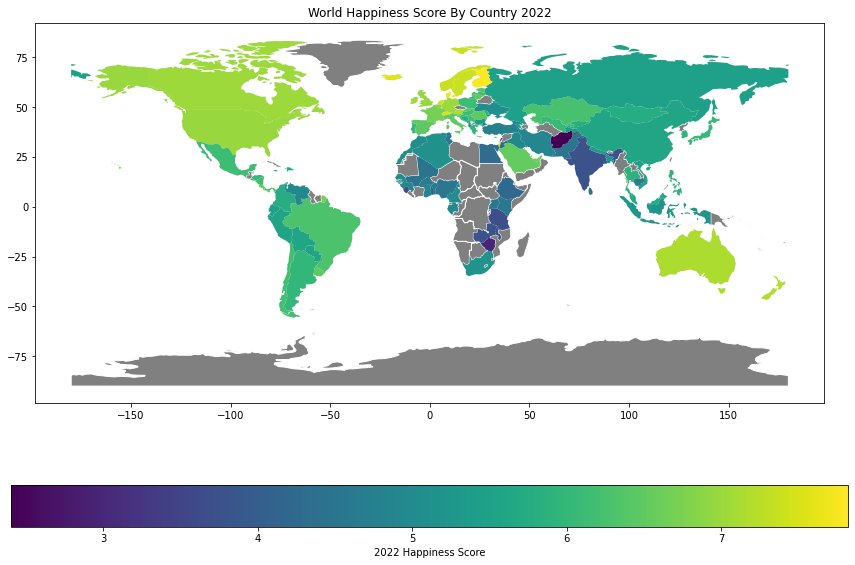

In [9]:
ax2 = world.plot(figsize=(15,10), edgecolor=u'white', color='gray')

world.plot(column='2022 Happiness score',
         ax=ax2,
        legend=True,
        legend_kwds={'label': "2022 Happiness Score",
                     'orientation': 'horizontal'})
ax2.axis('scaled')
plt.title("World Happiness Score By Country 2022")
plt.show()

## Visualizing Happiness by Latitude & Longitude on Consistent Yearly Data

Now that we have done our initial visualization of our dataset, we return to our main data set with ```get_consistent_yearly``` for the rest of these visualizations. Here, we also make sure that European notation floats are converted correctly.

In [10]:
df = get_consistent_yearly().merge(get_country(), left_on="Country or region", right_on="country", how="inner").drop_duplicates()
df = df.dropna()
    
num_features = ["GDP per capita", "Social support", "Healthy life expectancy",
   "Freedom to make life choices", "Perceptions of corruption", "Generosity", "latitude", "longitude"]
    
for feature in num_features + ["Score"]:
    df[feature] = df[feature].apply(to_floats)

We then group this data by country to get their average score over their years in the dataset.

In [11]:
avg_scores = df[["Country or region", "Score", "latitude", "longitude"]].groupby(by="Country or region").mean().sort_values(by=["latitude"], ascending=True)
avg_scores.head()

Score   latitude   longitude
Country or region                                 
New Zealand        7.292700 -40.900557  174.885971
Argentina          6.270962 -38.416097  -63.616672
Chile              6.439937 -35.675147  -71.542969
Uruguay            6.437638 -32.522779  -55.765835
South Africa       4.792512 -30.559482   22.937506

### Objective: Visualizing Happiness By Latitude

In this subsection, we look to visualize happines by latitude. We begin by binning our data by latitude to get the average score for given latitude lines as the average of all countries within close proximity of this line.

In [12]:
lat_scores = np.zeros((181, 1))

lat_delta = 3
for lat in range(-90, 91):
    scores_in_range = avg_scores[(avg_scores.latitude > (lat - lat_delta)) & (avg_scores.latitude < (lat + lat_delta))]
    lat_scores[lat + 90] = scores_in_range.Score.mean()

min_ = lat_scores[~np.isnan(lat_scores)].min()
lat_scores[np.isnan(lat_scores)] = min_ - 1

Then, we create a meshgrid to layer behind our world map.

In [13]:
lats = np.arange(-90, 91)
longs = np.arange(-180, 181)
mesh_lats, mesh_longs = np.meshgrid(lats, longs)
mesh_lat_scores, _ = np.meshgrid(lat_scores, longs)

And then we finally put it all together in a final plot. The white regions have no countries, so we denote this as so with a white value.

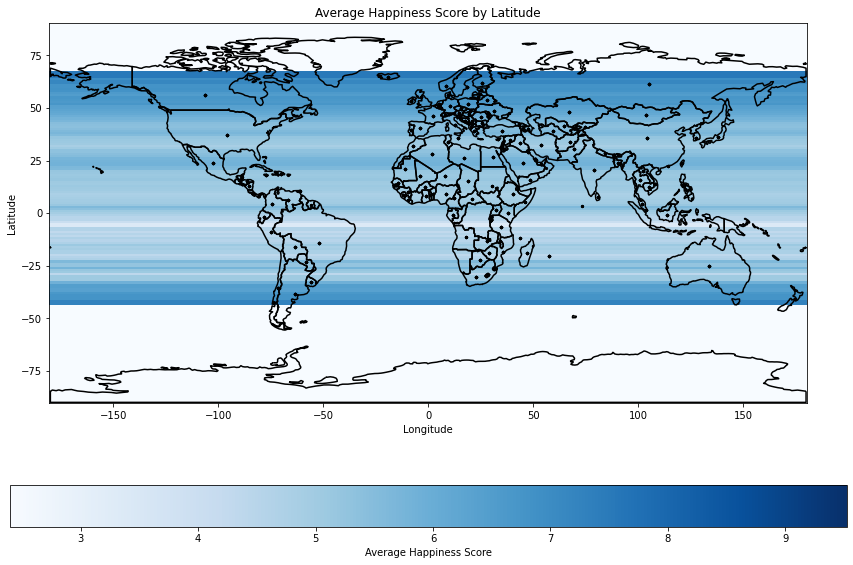

In [14]:
ax = world.boundary.plot(figsize=(15,10), edgecolor=u'black')
l_c,r_c  = mesh_lat_scores.min(), mesh_lat_scores.max()
mesh_plot = ax.pcolormesh(mesh_longs, mesh_lats, mesh_lat_scores, cmap='Blues', vmin=l_c, vmax=r_c + 2)
plt.colorbar(mesh_plot, ax=ax, orientation='horizontal', label="Average Happiness Score")
plt.scatter(df.longitude, df.latitude, s=5, alpha=1, vmin=0, vmax=1, color="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Happiness Score by Latitude")
plt.show()

***Analysis:*** From this plot, we can see that generally, as we get closer to the equator, the average happiness per latitude lines tends to decrease. This is quite interesting because we thought that these warmer regions might be happier, but it seems that these regions may be "too hot", so the happiness ends up being lower. The place of least happiness was actually just South of the equator, which makes sense also because we know that the countries in this area tend to be more third-world countries.

### Objective: Visualizing Happiness By Longitude

In this subsection, we look to visualize happines by longitude. We begin by binning our data by longitude to get the average score for given longitude lines as the average of all countries within close proximity of this line.

In [15]:
long_scores = np.zeros((361, 1))

long_delta = 5
for long in range(-180, 181):
    scores_in_range = avg_scores[(avg_scores.longitude > (long - long_delta)) & (avg_scores.longitude < (long + long_delta))]
    long_scores[long + 180] = scores_in_range.Score.mean()
    
min_ = long_scores[(~np.isnan(long_scores)) & (long_scores != 0)].min()
long_scores[long_scores == 0] = min_ - 1
long_scores[np.isnan(long_scores)] = min_ - 1

Once again, we create mesh grid for our final plot.

In [16]:
lats = np.arange(-90, 91)
longs = np.arange(-180, 181)
mesh_lats, mesh_longs = np.meshgrid(lats, longs)
_, mesh_long_scores = np.meshgrid(lats, long_scores)

And we put it all together, leaving regions with no countries white.

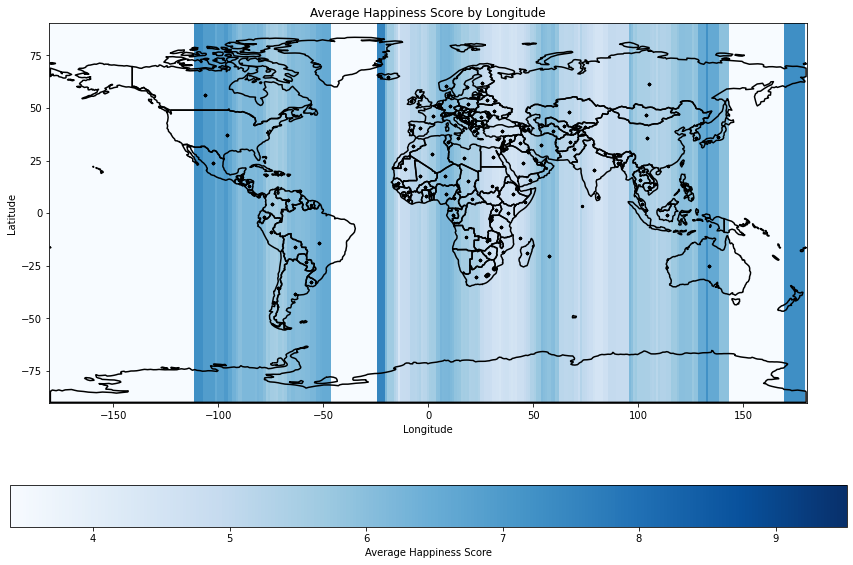

In [17]:
ax = world.boundary.plot(figsize=(15,10), edgecolor=u'black')
l_c,r_c  = mesh_long_scores.min(), mesh_long_scores.max()
mesh_plot = ax.pcolormesh(mesh_longs, mesh_lats, mesh_long_scores, cmap='Blues', vmin=l_c, vmax=r_c + 2)
plt.colorbar(mesh_plot, ax=ax, orientation='horizontal', label="Average Happiness Score")
plt.scatter(df.longitude, df.latitude, s=5, alpha=1, vmin=0, vmax=1, color="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Happiness Score by Longitude")
plt.show()

***Analysis:*** From this plot, we can see that there is a tendency for the American continent to be slighly happier compared to the Eurasian continets from looking at this plot. While there are some rises and falls across Eurasia, we see that on average, the countries on these longitude lines tend to be less happy compared to the Americas. Additionally, we see another spike in Oceania, where we see happiness scores similar to the Americas.

### Visualizing Progression Over Time

In this section, we look to understand how the data progresses over time, to get an understanding of any trends that are occurring in the data.

***Disclaimer:*** We already had a ton of content as is, so we didn't continue pushing with the study of this data set. Because of this, the analysis here is a little more sparse.

In [18]:
const_yearly = get_consistent_yearly()
min_year = const_yearly.year.min()
max_year = const_yearly.year.max()
const_yearly.head()

Country or region  Overall rank  Score GDP per capita Social support  \
0       Switzerland             1  7.587        1.39651        1.34951   
1           Iceland             2  7.561        1.30232        1.40223   
2           Denmark             3  7.527        1.32548        1.36058   
3            Norway             4  7.522          1.459        1.33095   
4            Canada             5  7.427        1.32629        1.32261   

  Healthy life expectancy Freedom to make life choices  \
0                 0.94143                      0.66557   
1                 0.94784                      0.62877   
2                 0.87464                      0.64938   
3                 0.88521                      0.66973   
4                 0.90563                      0.63297   

  Perceptions of corruption Generosity  year  
0                   0.41978    0.29678  2015  
1                   0.14145     0.4363  2015  
2                   0.48357    0.34139  2015  
3                   0.36503    0.34699  2015  
4                   0.32957    0.45811  2015

We once again transform our data to scores.

In [19]:
const_yearly["score"] = const_yearly.Score.apply(to_floats)
const_yearly.score.dtype

dtype('float64')

We merge the yearly data with continents that they are a part of.

In [20]:
cy = const_yearly
cy = pd.merge(cy, data[["country", "Continent", "latitude", "longitude"]], left_on="Country or region", right_on="country", how="left")
cy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1229
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             1230 non-null   object 
 1   Overall rank                  1230 non-null   int64  
 2   Score                         1230 non-null   object 
 3   GDP per capita                1230 non-null   object 
 4   Social support                1230 non-null   object 
 5   Healthy life expectancy       1230 non-null   object 
 6   Freedom to make life choices  1230 non-null   object 
 7   Perceptions of corruption     1229 non-null   object 
 8   Generosity                    1230 non-null   object 
 9   year                          1230 non-null   int64  
 10  score                         1230 non-null   float64
 11  country                       912 non-null    object 
 12  Continent                     912 non-null    object 
 13  lat

#### North America

Here, we define a country that can be used to plot features over the years for different countries in a given contient for a certain feature. Exemplified below, we show this progression for North America. 

It seems like generally, North America has a fairly high happiness score and the lower score countries are on the rise.

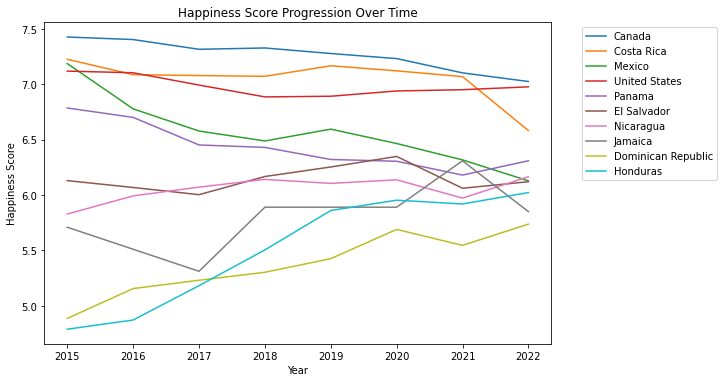

In [21]:
def progression_over_time(continent, feature, lat_range=[-90, 90], long_range=[-180, 180]):
    countries = cy.country[(cy.Continent == continent) & (cy.latitude >= lat_range[0]) & (cy.latitude <= lat_range[1]) & (cy.longitude >= long_range[0]) & (cy.longitude <= long_range[1])].unique()
    for country in countries:
        country_samples = cy[cy["Country or region"] == country]
        plt.plot(country_samples.year, country_samples[feature], label=country)
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()
    plt.title("Happiness Score Progression Over Time")
    plt.xlabel("Year")
    plt.ylabel("Happiness Score")
    plt.show()
    
progression_over_time("North America", "score")

#### South America

And here, we do the same for South America. Sadly, it looks like South America is getting sadder.

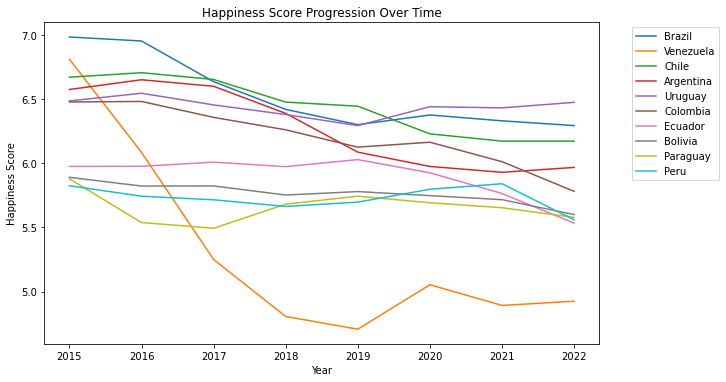

In [22]:
progression_over_time("South America", "score")

#### Western Europe

Finally, we can look at Western Europe. Europe seems to be in a holding pattern or on the up. We also see that the Nordic countries have a consistenly high score over time.

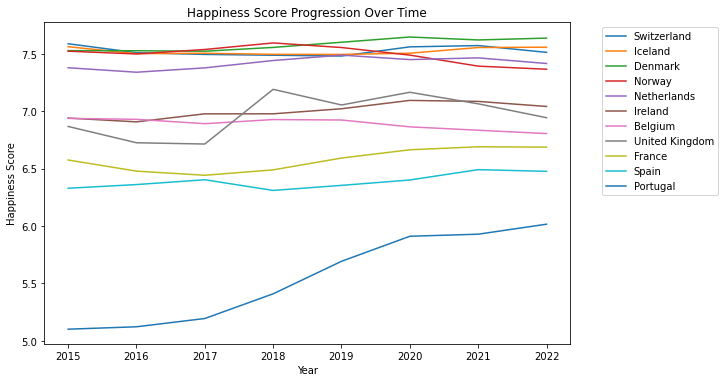

In [23]:
progression_over_time("Europe", "score", long_range=[-180, 10])

# Result Analysis

Based on the results of this notebook, we can analyze our results to try and answer the following original objectives:

**4. Determine which latitude and longitude ranges are the happiest (use mean happiness over the years in the happiness reports).**

From the happiness scores that we saw in the plot of latitude versus happiness, we saw that the happiness tended to be higher in regions that were more temperate. As we aproached the equator, we tended to see that the happiness decreased. This could be due to many different factors such as their main resources, climate, political factors, but it is interesting to see these differences visualized.

From the plot we saw in the plot of longitude verus happiness, we saw that the happiness tended to be higher in the Americas and Oceania compared to the Eurasian continents, when we examined this plot. This does not definitively say these continents have less happines, because for example, we see that Europe and Africa are in similar longitude ranges, so they could be canceling each other out. Regardless, it is interesting to see that there are differences in happiness based on longitude.

# Resources

- https://stackoverflow.com/questions/69133780/matplotlib-how-to-plot-a-random-colour-to-all-countries-from-the-list